In [37]:
import numpy as np
import pandas as pd

df = pd.read_csv('./datasets/PV_firstRelease.csv')

In [38]:
print(df.head(5))

   Hour  Starting minute (inclussive)  Ending minute (exclussive)  \
0     0                             0                           5   
1     0                             5                          10   
2     0                            10                          15   
3     0                            15                          20   
4     0                            20                          25   

   Generated power  TemperatureC  DewpointC  PressurehPa  \
0                0             0          0            0   
1                0             0          0            0   
2                0            11          8         1021   
3                0            11          8         1021   
4                0            11          8         1021   

   WindDirectionDegrees  WindSpeedKMH  WindSpeedGustKMH  Humidity  \
0                     0             0                 0         0   
1                     0             0                 0         0   
2                

In [39]:
drop_index = []
def append_index_to_drop(x):
    drop_index.append(x)
    
X = [append_index_to_drop(x) if df['Generated power'].iloc[x] != 0 and df['SolarRadiationWatts_m2'].iloc[x] == 0 else x for x in range(len(df['SolarRadiationWatts_m2']))]

df.drop(drop_index, axis=0, inplace=True)

In [40]:
def calculate_mean_hour_values(rows):
    hour = df['Hour'].iloc[rows[0]]
    gen_power= 0
    temp= 0
    dewpoint= 0
    pressure=0
    wind_direction= 0
    wind_speed= 0
    wind_gust= 0
    humidity= 0
    hourly_precip = 0
    daily_rain = 0
    solar_radiation = 0
    #Generated power,TemperatureC,DewpointC,PressurehPa,WindDirectionDegrees,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2
    num = len(rows)
    for x in rows:
        gen_power += df['Generated power'].iloc[x]
        temp += df['TemperatureC'].iloc[x]
        dewpoint += df['DewpointC'].iloc[x]
        pressure += df['PressurehPa'].iloc[x]
        wind_direction += df['WindDirectionDegrees'].iloc[x]
        wind_speed += df['WindSpeedKMH'].iloc[x]
        wind_gust += df['WindSpeedGustKMH'].iloc[x]
        humidity += df['Humidity'].iloc[x]
        hourly_precip += df['HourlyPrecipMM'].iloc[x]
        daily_rain += df['dailyrainMM'].iloc[x]
        solar_radiation += df['SolarRadiationWatts_m2'].iloc[x]

    return [hour, gen_power/num, temp/num, dewpoint/num, pressure/num, wind_direction/num, wind_speed/num, wind_gust/num, humidity/num, hourly_precip/num, daily_rain/num, solar_radiation/num]

In [ ]:
matriz = []
last_hour = df['Hour'].iloc[0]
rows = []
for x in range(len(df['SolarRadiationWatts_m2'])):
    hour = df['Hour'].iloc[x]
    if hour != last_hour:
        matriz.append(calculate_mean_hour_values(rows))
        rows = []
        last_hour = hour
    rows.append(x)
if rows != []:
    matriz.append(calculate_mean_hour_values(rows))

df = pd.DataFrame(matriz,columns=["Hour","Generated power","TemperatureC","DewpointC","PressurehPa","WindDirectionDegrees","WindSpeedKMH","WindSpeedGustKMH","Humidity","HourlyPrecipMM","dailyrainMM","SolarRadiationWatts_m2"])

df.to_csv("./new_csv.csv")

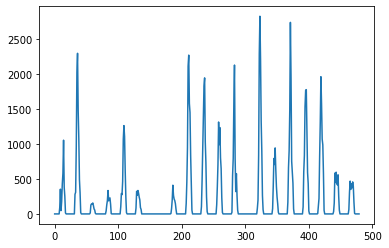

In [47]:
import matplotlib.pyplot as plt
days = 20
plt.plot(range(days*24), df['Generated power'][:days*24])

plt.show()
